# Part II - Ford GoBike usage patterns
## by Jeongho Kim

## Investigation Overview

Bicycle rentals are mostly made around 8 am and 5 pm on weekdays, which are the commute times. In addition to commuting to work, non-subscribers use bicycles for entertainment on weekends more than subscribers.


## Dataset Overview

Ford GoBike system data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata_wrangled.csv')
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
wdcategory = pd.api.types.CategoricalDtype(ordered=True, categories=weekdays)
df['weekday'] = df['weekday'].astype(wdcategory)

## The distribution of users by day and hour

It can be seen that users are concentrated in a specific time period on weekdays, not on weekends. It's right around 8 and 17 o'clock. You will notice that there are more users especially on Thursday.

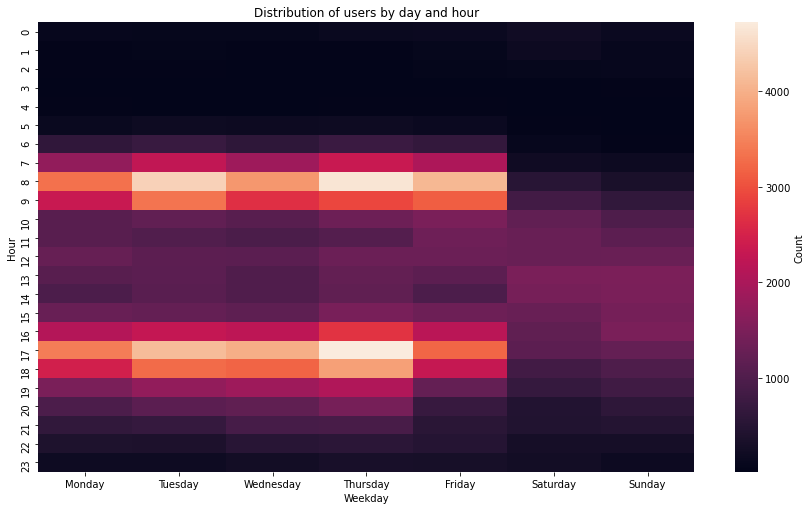

In [3]:
plt.figure(figsize=[14.70, 8.27])

w_h_counts = df.groupby(['weekday','hour']).size().reset_index(name='count').pivot(index='hour', columns='weekday', values='count')
sb.heatmap(w_h_counts, cbar_kws={'label': 'Count'})
plt.ylabel('Hour')
plt.xlabel('Weekday')
plt.title('Distribution of users by day and hour');

## The number of users per day and hour by subscription

In the case of subscribers, as seen earlier, it can be seen that users are crowded at specific times on weekdays. On the other hand, in the case of non-subscribers, this tendency is relatively weak, and it can be seen that there are many weekend users.

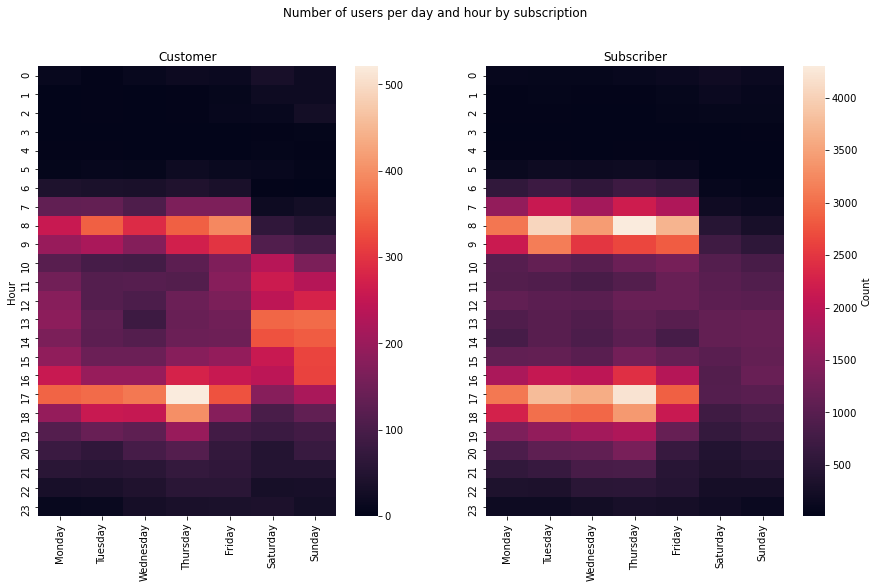

In [5]:
plt.figure(figsize=[14.70, 8.27])

plt.suptitle('Number of users per day and hour by subscription')
fig.supxlabel('Weekday')

plt.subplot(1,2,1)
w_h_counts = df[df.user_type=='Customer'].groupby(['weekday','hour']).size().reset_index(name='count').pivot(index='hour', columns='weekday', values='count')
sb.heatmap(w_h_counts)
plt.ylabel('Hour')
plt.xlabel('')
plt.title('Customer')

plt.subplot(1,2,2)
w_h_counts = df[df.user_type=='Subscriber'].groupby(['weekday','hour']).size().reset_index(name='count').pivot(index='hour', columns='weekday', values='count')
sb.heatmap(w_h_counts, cbar_kws={'label': 'Count'})
plt.ylabel('')
plt.xlabel('')
plt.title('Subscriber');

## The duration of each day of the week depending on subscription

For subscribers, it shows a uniform duration regardless of the day of the week. However, in the case of non-subscribers, we can see a tendency to use it for a longer time on weekends.

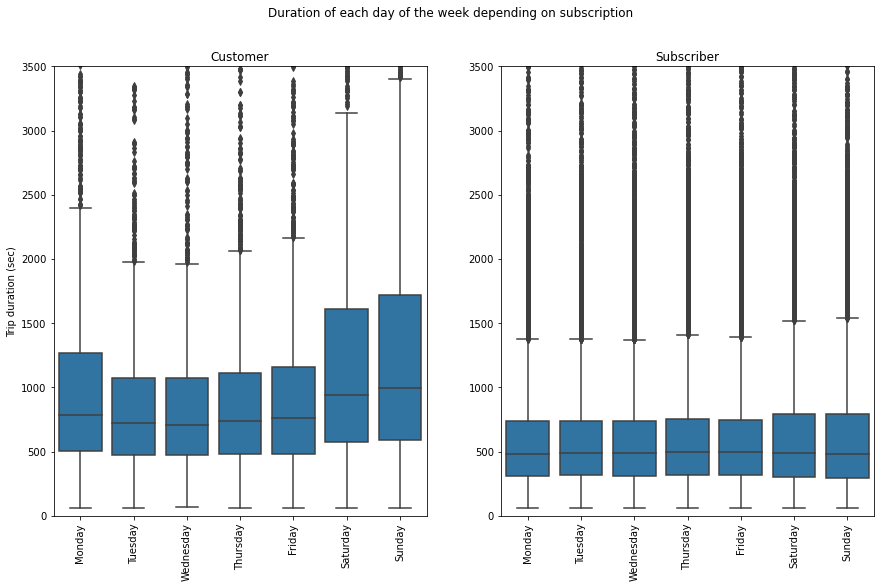

In [7]:
plt.figure(figsize=[14.70, 8.27])

base_color = sb.color_palette()[0]

plt.suptitle('Duration of each day of the week depending on subscription')
fig.supxlabel('Weekday')

plt.subplot(1,2,1)
sb.boxplot(data=df[df.user_type=='Customer'], x='weekday', y='duration_sec', color=base_color)
plt.ylim(0,3500)
plt.xticks(rotation=90)
plt.ylabel('Trip duration (sec)')
plt.xlabel('')
plt.title('Customer')

plt.subplot(1,2,2)
sb.boxplot(data=df[df.user_type=='Subscriber'], x='weekday', y='duration_sec', color=base_color)
plt.ylim(0,3500)
plt.xticks(rotation=90)
plt.ylabel('')
plt.xlabel('')
plt.title('Subscriber');

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt